In [2]:
import pandas as pd  
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostRegressor

In [3]:
data = pd.read_csv("./District/NumberingDistrict.csv")
#data = data.drop(columns = ['district'])
data = data.drop(columns = ['number_of_land', 'total_ntd'])
data = data[data['unit_ntd'] > 0]
delete = data[((data.unit_ntd > 600000) | 
               (data.transaction_year < 2019) | 
               (data.land_shift_area <= 0)
              )].index
data = data.drop(delete)
data

,district,land_shift_area,complete_year,building_shift_total_area,num_room,num_hall,num_toilet,num_partition,management_org,unit_ntd,carpark_shift_area,carpark_ntd,transaction_year,transaction_month,building_age,number_of_building,number_of_carpark
0,10,4.00,0.000000,0.00,0,0,0,1,0,400000.000000,0.00,0,2019,10,2019.000000,0,0
1,1,40.75,62.062500,109.36,4,0,4,1,0,108357.717630,0.00,0,2019,10,1956.937500,1,0
2,1,33.81,69.000000,109.42,3,2,2,1,0,91390.970572,0.00,0,2019,10,1950.000000,1,0
3,1,32.19,84.000000,163.53,3,2,2,1,1,128416.804256,0.00,0,2019,4,1935.000000,1,1
4,1,60.25,108.000000,204.79,3,2,3,1,1,328157.624884,0.00,0,2019,10,1911.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,11,13.10,67.000000,46.22,3,1,1,1,0,118996.105582,0.00,0,2020,1,1953.000000,1,0
5906,1,24.75,89.000000,122.18,3,2,2,1,1,196431.494516,7.42,1700000,2019,12,1930.000000,1,1
5907,1,29.04,73.114286,116.50,5,3,3,1,0,115450.643777,0.00,0,2019,11,1945.885714,1,0
5908,10,41.71,87.000000,155.03,3,2,2,1,1,243307.746888,0.00,0,2019,11,1932.000000,1,1


In [4]:
INTERVAL = 1000
data['unit_ntd'] = (data['unit_ntd'] // INTERVAL) * INTERVAL
data

,district,land_shift_area,complete_year,building_shift_total_area,num_room,num_hall,num_toilet,num_partition,management_org,unit_ntd,carpark_shift_area,carpark_ntd,transaction_year,transaction_month,building_age,number_of_building,number_of_carpark
0,10,4.00,0.000000,0.00,0,0,0,1,0,400000.0,0.00,0,2019,10,2019.000000,0,0
1,1,40.75,62.062500,109.36,4,0,4,1,0,108000.0,0.00,0,2019,10,1956.937500,1,0
2,1,33.81,69.000000,109.42,3,2,2,1,0,91000.0,0.00,0,2019,10,1950.000000,1,0
3,1,32.19,84.000000,163.53,3,2,2,1,1,128000.0,0.00,0,2019,4,1935.000000,1,1
4,1,60.25,108.000000,204.79,3,2,3,1,1,328000.0,0.00,0,2019,10,1911.000000,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5905,11,13.10,67.000000,46.22,3,1,1,1,0,118000.0,0.00,0,2020,1,1953.000000,1,0
5906,1,24.75,89.000000,122.18,3,2,2,1,1,196000.0,7.42,1700000,2019,12,1930.000000,1,1
5907,1,29.04,73.114286,116.50,5,3,3,1,0,115000.0,0.00,0,2019,11,1945.885714,1,0
5908,10,41.71,87.000000,155.03,3,2,2,1,1,243000.0,0.00,0,2019,11,1932.000000,1,1


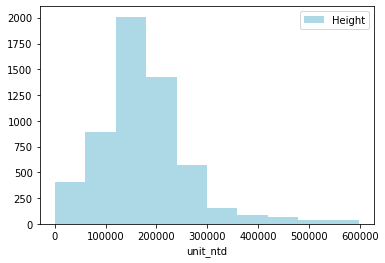

In [5]:
plt.hist(data.unit_ntd, density=False, color = 'lightblue', cumulative = False, label = "Height")
plt.legend()
plt.xlabel('unit_ntd')
plt.show()

In [6]:
#Model
reg = LinearRegression()
#Data and target
X = data.drop(columns=['unit_ntd']).values
y = data['unit_ntd'].values
#Cross validation
#Score = ((y_true - y_pred) ^ 2).sum()
#predicted = cross_validate(reg, X, y, cv = 10)
#predicted

In [7]:
predict_ntd = cross_val_predict(reg, X, y ,cv = 10)
display(abs(y - predict_ntd))
display(abs(y - predict_ntd).mean())
#predict_ntd

array([227675.35510573,  30489.32939057,  43939.09681085, ...,
        26285.98319446,  41183.56864561,  72463.28604856])

55654.64160701808

In [8]:
#Model
reg = DecisionTreeRegressor()
#Data and target
X = data.drop(columns=['unit_ntd']).values
y = data['unit_ntd'].values
#Cross validation
#Score = ((y_true - y_pred) ^ 2).sum()
#predicted = cross_validate(reg, X, y, cv = 10)
#predicted

In [9]:
predict_ntd = cross_val_predict(reg, X, y ,cv = 10)
display(abs(y - predict_ntd))
display(abs(y - predict_ntd).mean())
#predict_ntd

array([390000.,  55000.,  19000., ...,  25000.,  83000., 132000.])

53912.826150688954

In [10]:
#RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1000, n_jobs=-1)

X = data.drop(columns=['unit_ntd']).values
y = data['unit_ntd'].values
#Cross validation
#Score = ((y_true - y_pred) ^ 2).sum()
#predicted = cross_validate(reg, X, y, cv = 10)
#predicted

In [11]:
predict_ntd = cross_val_predict(reg, X, y ,cv = 10)
display(abs(y - predict_ntd))
display(abs(y - predict_ntd).mean())
#predict_ntd

array([339455.,  16950.,  15470., ...,  14085.,  76662., 109445.])

41056.95896233103

In [ ]:
#Adaboost

bdt = AdaBoostRegressor(reg, n_estimators=100, random_state=0, learning_rate= 0.8)
predict_ntd = cross_val_predict(bdt, X, y ,cv = 10)
display(abs(y - predict_ntd))
display(abs(y - predict_ntd).mean())

In [76]:
# Predict for real house
reg = DecisionTreeRegressor()
X = data.drop(columns=['unit_ntd']).values
y = data['unit_ntd'].values
reg.fit(X, y)


test = [[12, 321.7, 5.0, 163.0, 4, 2, 3, 1, 1, 24.8, 0, 2020, 12, 2015, 1, 2],
        [8, 13.88, 14, 12.16, 1, 1, 1, 1, 0, 0, 0,2020, 11, 2006, 1, 0]]
reg.predict(test)

array([432000., 516000.])

In [77]:
'''
from sklearn.svm import SVR
#Model
reg = SVR(kernel='rbf', C=1e3, gamma=0.1)
#Data and target
X = data.drop(columns=['unit_ntd']).values
y = data['unit_ntd'].values
#Cross validation
#Score = ((y_true - y_pred) ^ 2).sum()
predicted = cross_validate(reg, X, y, cv = 10)
'''

"\nfrom sklearn.svm import SVR\n#Model\nreg = SVR(kernel='rbf', C=1e3, gamma=0.1)\n#Data and target\nX = data.drop(columns=['unit_ntd']).values\ny = data['unit_ntd'].values\n#Cross validation\n#Score = ((y_true - y_pred) ^ 2).sum()\npredicted = cross_validate(reg, X, y, cv = 10)\n"

In [78]:
'''
from sklearn.model_selection import cross_val_predict
predict_ntd = cross_val_predict(reg, X, y ,cv = 10)
display(abs(y - predict_ntd))
display(abs(y - predict_ntd).mean())

#predict_ntd
'''

'\nfrom sklearn.model_selection import cross_val_predict\npredict_ntd = cross_val_predict(reg, X, y ,cv = 10)\ndisplay(abs(y - predict_ntd))\ndisplay(abs(y - predict_ntd).mean())\n\n#predict_ntd\n'

SyntaxError: invalid character in identifier (<ipython-input-1-e7c554b54db1>, line 1)